In [11]:
from pathlib import Path

from dotenv import load_dotenv
import geopandas as gpd
import pandas as pd
from shapely import Point

from sample_mapillary_detections.mapillary import (
    get_detections_for_image,
    get_nearest_image_with_detections,
    get_total_detection_proportions,
    request_images,
)
from sample_mapillary_detections.sampling import halton_sampler


In [2]:
load_dotenv()


True

In [3]:
PROJ_ROOT = Path.cwd().parent
PROJ_ROOT


PosixPath('/Users/jay/repos/sample-mapillary-detections')

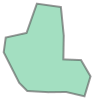

In [4]:
# Load sample target geo
gdf = gpd.read_file(PROJ_ROOT / "data" / "BeverlyHills.geojson")

target_geo = gdf.geometry[0]
target_geo


<Axes: >

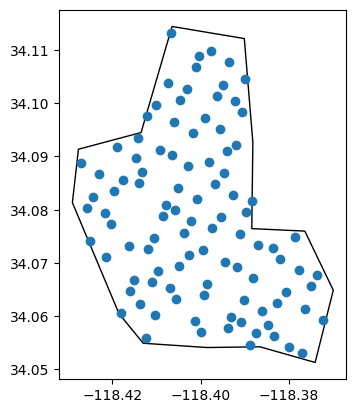

In [5]:
sampler = halton_sampler(target_geo)
n_samples = 100

samples_gdf = gpd.GeoDataFrame(
    geometry=[Point(next(sampler)) for _ in range(n_samples)], crs=gdf.crs
)

gpd.GeoDataFrame(pd.concat([gdf, samples_gdf], ignore_index=True)).plot(facecolor="none")


In [6]:
point = samples_gdf.geometry[0]

images_resp = request_images(point)
images_resp


<Response [200 OK]>

In [7]:
image = get_nearest_image_with_detections(images_resp.json(), point)
image


Image(id='927936512339209', geometry=<POINT (-118.4 34.073)>)

In [ ]:
detections = get_detections_for_image(image)

print(len(detections))
detections[:5]


[Detection(value='construction--structure--building', geometry=DetectionGeometry(extent=4096, features=[<POLYGON ((1950 2032, 1950 2015, 1944 2019, 1944 2036, 1948 2040, 1950 2032))>])),
 Detection(value='construction--structure--building', geometry=DetectionGeometry(extent=4096, features=[<POLYGON ((1956 2032, 1982 2032, 1991 2023, 1989 1999, 1974 1999, 1972 1991,...>])),
 Detection(value='construction--structure--building', geometry=DetectionGeometry(extent=4096, features=[<POLYGON ((2359 2060, 2357 2109, 2361 2122, 2361 2175, 2363 2236, 2374 2249,...>])),
 Detection(value='construction--structure--building', geometry=DetectionGeometry(extent=4096, features=[<POLYGON ((2140 1987, 2140 1999, 2144 2003, 2146 1987, 2140 1987))>])),
 Detection(value='construction--structure--building', geometry=DetectionGeometry(extent=4096, features=[<POLYGON ((2193 2142, 2202 2146, 2214 2150, 2216 2150, 2222 2142, 2222 2118,...>])),
 Detection(value='construction--structure--building', geometry=Detecti

In [12]:
total_proportions = get_total_detection_proportions(detections)
total_proportions


{'nature--terrain': 0.0,
 'nature--vegetation': 0.03533428907394409,
 'nature--water': 0.0,
 'nature--sky': 0.3978103697299957,
 'construction--structure--building': 0.08688938617706299}